# QUANTUM COMPUTING
## Course Project: 5-BIT Quantum Error Correcting Code

Submitted by:  
Adithi S Upadhya  
Poorvi SHM 
Rachana H 

In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 5.2 MB/s 
     |████████████████████████████████| 19.2 MB 1.1 MB/s 
     |████████████████████████████████| 240 kB 41.5 MB/s 
     |████████████████████████████████| 106 kB 50.6 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 943 kB 37.5 MB/s 
     |████████████████████████████████| 37.5 MB 1.4 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 4.1 MB 44.7 MB/s 
     |████████████████████████████████| 1.9 MB 59.1 MB/s 
     |████████████████████████████████| 112 kB 53.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.2-py3-none-any.whl size=12224 sha256=4e2dbd4c2fb7be273de07c480cea80173b5e9795ba7dd54f53e4530b44635627
  Stored in directory: /root/.cache/pip/wheels/30/dc/90/0ee55

In [2]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.2 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=047904a00b6e86b99bec42399b8c5daefa1491b225efed43fd75d916c7e4df19
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector
from math import pi
from qiskit.quantum_info import Statevector
import numpy as np

from qiskit.circuit.library.n_local.two_local import ZGate
from qiskit.circuit.library import MCMT

In [4]:
sim = Aer.get_backend('aer_simulator')

# Encoding
We use the following operators to encode our qubits:  
$$M_0=X_2X_3Z_1Z_4$$
$$M_1=X_3X_4Z_2Z_0$$
$$M_2=X_4X_0Z_3Z_1$$
$$M_3=X_0X_1Z_4Z_2$$  
  
Logical qubit basis vectors are encoded as follows:
$$|0⟩_L = \dfrac{1}{4}(I+M_0)(1+M_1)(I+M_2)(I+M_3)|00000⟩$$
$$|1⟩_L = \dfrac{1}{4}(I+M_0)(1+M_1)(I+M_2)(I+M_3)|11111⟩$$
  
We use the below identity to try to encode $|0⟩_L$:  
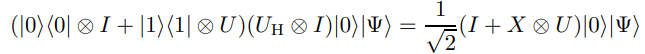

We encode $|0⟩_L$ first. We rewrite
$$\dfrac{1}{\sqrt{2}}(I+M_3)|00000⟩= \dfrac{1}{\sqrt{2}}(I+X_0X_1Z_4Z_2)|00000⟩$$  
Using the above mentioned identity, we can rewrite it as:  
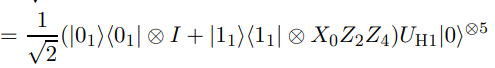  

Here the $U_{H1}$ is the Hadamard gate acting on the qubit 1. The $\dfrac{1}{\sqrt{2}}(I+M_3)|00000⟩$ has been implemented as the controlled - $X_0Z_2Z_4$ gate with the control qubit 1.  
Similarly $\dfrac{1}{2\sqrt{2}}(I+M_0)(1+M_1)(I+M_2)$ acts on the rest of the qubits to produce the Encoding.  
Additionally, we add a $Z_0$ gate to generate $|1⟩_L$ when the qubit 0 is in the $|1⟩$ state. 
We note that, 
$$|11111⟩= - M_3M_2M_0|10000⟩ = M_3M_2M_0Z_0|10000⟩$$  
Suppose the encoding circuit acts on the following state: 
$$Z_0(a|0⟩ + b|1⟩)|0000⟩ = a|00000⟩ − b|10000⟩$$
Then the circuit outputs, 
$$\dfrac{1}{4}(I+M_0)(1+M_1)(I+M_2)(I+M_3)(a|0⟩-b|1⟩)|0000⟩$$
$$=a|0⟩_L + bM_3M_2M_0|1⟩_L= a|0⟩_L + b|1⟩_L$$  
We used the fact that the Operators are commutative and that $|1⟩_L$ is a simultaneous egenvector of M, with all eigenvalues 1.  
The Circuit can be re-written as:
$$ U_{5-encoding}= \dfrac{1}{4}(I+M_0)(1+M_1)(I+M_2)(I+M_3)Z_0 $$
The full encoding circuit can be written as:  
$$U_{5-encoding}(a|0⟩+b|1⟩)|0000⟩= a|0⟩_L + b|1⟩_L$$

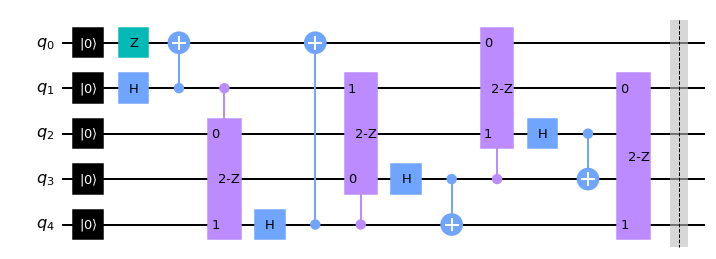

In [5]:
# Encoding
#Creating a quantum circuit with 5 qubits which includes our message qubit and 4 qubits to encode our qubit 1.
qc_5q = QuantumCircuit(5)
qc_5q.reset(range(5))

cz2 = MCMT('cz', 1, 2)

#Uncomment to generate inital state of qubit 1
#qc_5q.x(0)
#qc_5q.h(0) 
#Uncomment Hadamard gate for |+⟩ and uncomment both for |-⟩ states

qc_5q.z(0)

#encoding using the qubit 2 as the control (I+M3)
qc_5q.h(1)
qc_5q.cx(1, 0)
#qc_5q.cz(1, 2)
#qc_5q.cz(1, 4)
qc_5q.compose(cz2, qubits=[1, 2, 4], inplace=True)

#encoding using the qubit 5 as the control (I+M2)
qc_5q.h(4)
qc_5q.cx(4, 0)
#qc_5q.cz(4, 1)
#qc_5q.cz(4, 3)
qc_5q.compose(cz2, qubits=[4, 3, 1], inplace=True)

#encoding using the qubit 4 as the control (I+M1)
qc_5q.h(3)
qc_5q.cx(3, 4)
#qc_5q.cz(3, 0)
#qc_5q.cz(3, 2)
qc_5q.compose(cz2, qubits=[3, 0, 2], inplace=True)

#encoding using the qubit 3 as the control (I+M0)
qc_5q.h(2)
qc_5q.cx(2, 3)
#qc_5q.cz(2, 1)
#qc_5q.cz(2, 4)
qc_5q.compose(cz2, qubits=[2, 1, 4], inplace=True)

qc_5q.barrier()
qc_5q.draw('mpl')


In [6]:
# Adding error: Bit-flip eror, Phase-flip error, Bit+Phase- flip error
def apply_err(n, err):
  qc = QuantumCircuit(int(n), name='Error')
  which_qubit = np.random.randint(n)

  if err=='bit':
    qc.x(which_qubit)

  elif err=='phase':
    qc.z(which_qubit)

  elif err=='bit+phase':
    qc.x(which_qubit)
    qc.z(which_qubit)

  else:
    pass

  err = qc.to_gate()

  return err, which_qubit

BIT+PHASE FLIP error in qubit: 1


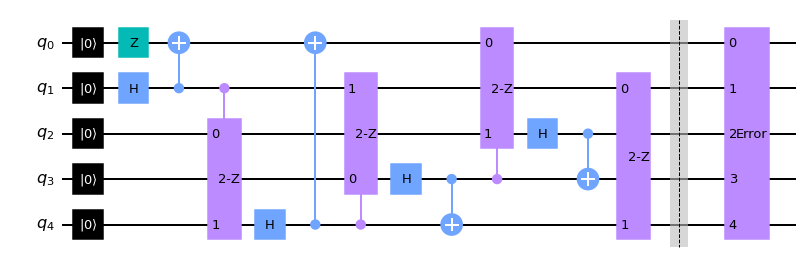

In [7]:
#Uncomment accordingly to generate respective errors

# BIT FLIP ERROR
# err, which_qubit = apply_err(5, 'bit')
# print("BIT FLIP Error in qubit:", which_qubit)

#PHASE FLIP ERROR
# err, which_qubit = apply_err(5, 'phase')
# print("PHASE FLIP error in qubit:", which_qubit)

#PHASE FLIP ERROR
err, which_qubit = apply_err(5, 'bit+phase')
print("BIT+PHASE FLIP error in qubit:", which_qubit)


qc_5q.append(err, range(5))
qc_5q.draw('mpl')

In [8]:
# Adding auxiliary & syndrome bits for error correction
qc_5q.add_register(QuantumRegister(4, 'auxiliary'))
qc_5q.add_register(ClassicalRegister(4, 'syndrome'))

# Error Syndrome Detection  
The eigen values of the four $M_i$ operators are used to detect errors in the transmitted codewords.  
We know that $|0⟩_L$, $|1⟩_L$ and any linear combination of these states are eigenvectors of $M_i$ with all eigenvalues as $+1$.  
Example, the bit-flip error acting on the first qubit given by $X_0$ acts on the state $$X_0(a|0⟩_L+b|1⟩_L)$$ and generates the syndrome $$(M_0,M_1,M_2,M_3)= (+1, -1, +1, +1).$$  
Similarly, the syndrome is measured by finding eigenvalues of $M_i$ with respect to different single-qubit errors $(X_i, Y_i, Z_i)$ and the following matrix is generated:  
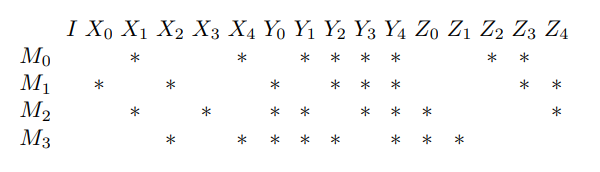  

Here, $*$ denotes the $-1$ eigenvalue and $+1$ eigenvalue is denoted by a blank space.  
The error detection circuit is constructed below.

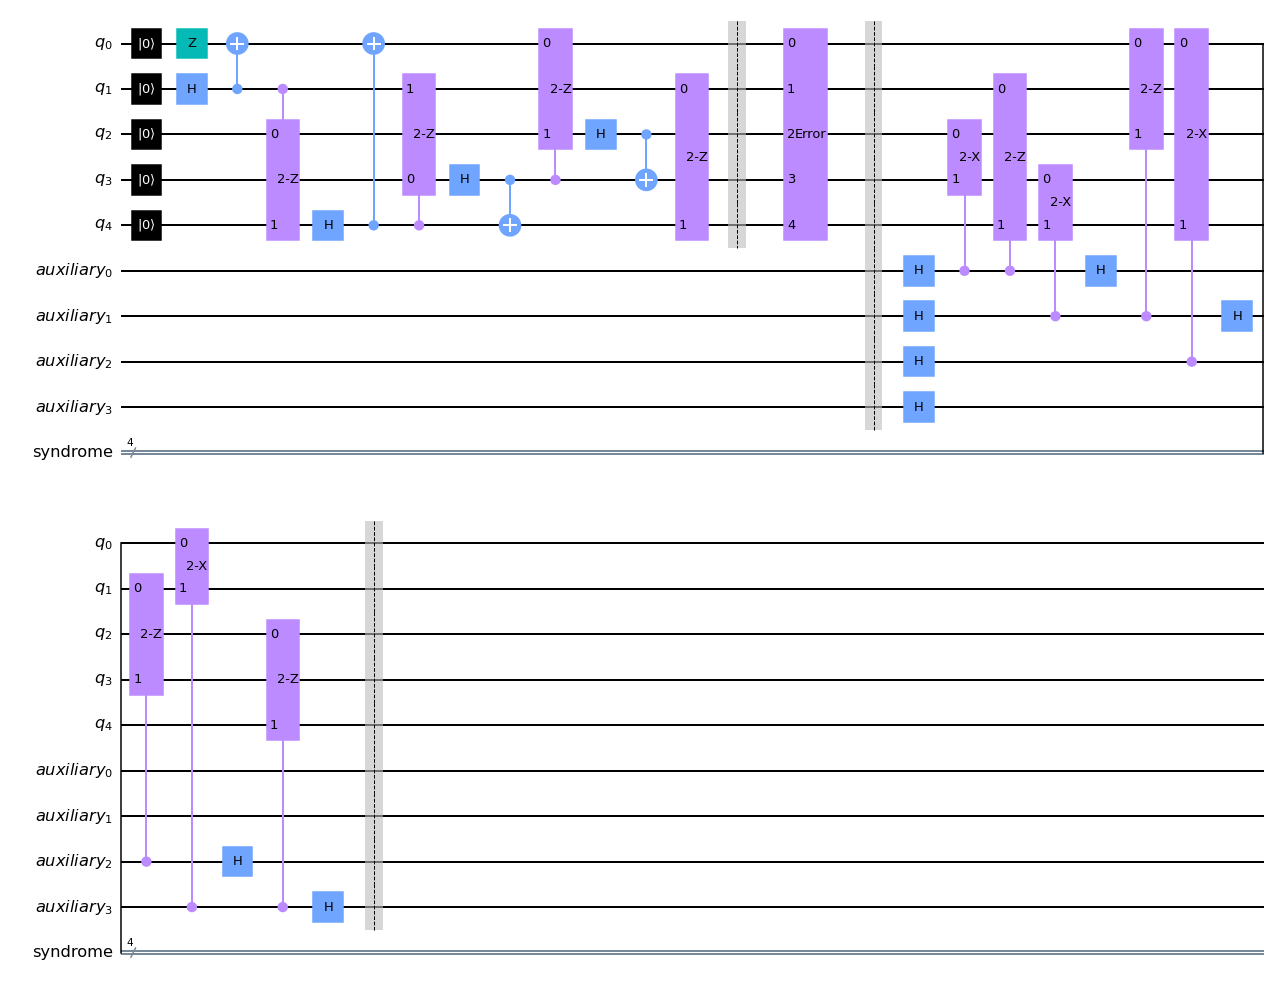

In [9]:
# Syndrome Detection
qc_5q.barrier()
c_z2 = MCMT('cz', 1, 2)
c_x2 = MCMT('cx', 1, 2)

for i in range(4):
  qc_5q.h(5+i)

#qc_5q.cx(5, 2)
#qc_5q.cx(5, 3)
qc_5q.compose(c_x2, qubits=[5, 2, 3], inplace=True)
qc_5q.compose(c_z2, qubits=[5, 1, 4], inplace=True)

#qc_5q.cx(6, 3)
#qc_5q.cx(6, 4)
qc_5q.compose(c_x2, qubits=[6, 3, 4], inplace=True)
qc_5q.compose(c_z2, qubits=[6, 0, 2], inplace=True)

#qc_5q.cx(7, 0)
#qc_5q.cx(7, 4)
qc_5q.compose(c_x2, qubits=[7, 0, 4], inplace=True)
qc_5q.compose(c_z2, qubits=[7, 1, 3], inplace=True)

#qc_5q.cx(8, 0)
#qc_5q.cx(8, 1)
qc_5q.compose(c_x2, qubits=[8, 0, 1], inplace=True)
qc_5q.compose(c_z2, qubits=[8, 2, 4], inplace=True)

for i in range(4):
  qc_5q.h(5+i)

qc_5q.barrier()
qc_5q.draw('mpl')


# Error Correction

To correct an error, the same operation has to be performed on the physical qubit based on it syndrome.  
The syndrome and their respective error operations are given below:  

Error operation| Syndrome|Error operation| Syndrome| Error operation| Syndrome
:---:|:---:|:---:|:---:|:---:|:---:
$X_0$|0010|$Y_0$|1110|$Z_0$|1100
$X_1$|0101|$Y_1$|1101|$Z_1$|1000
$X_2$|1010|$Y_2$|1011|$Z_2$|0001
$X_3$|0100|$Y_3$|0111|$Z_3$|0011
$X_4$|1001|$Y_4$|1111|$Z_4$|0110

We constuct the error correction circuit based on the above table.


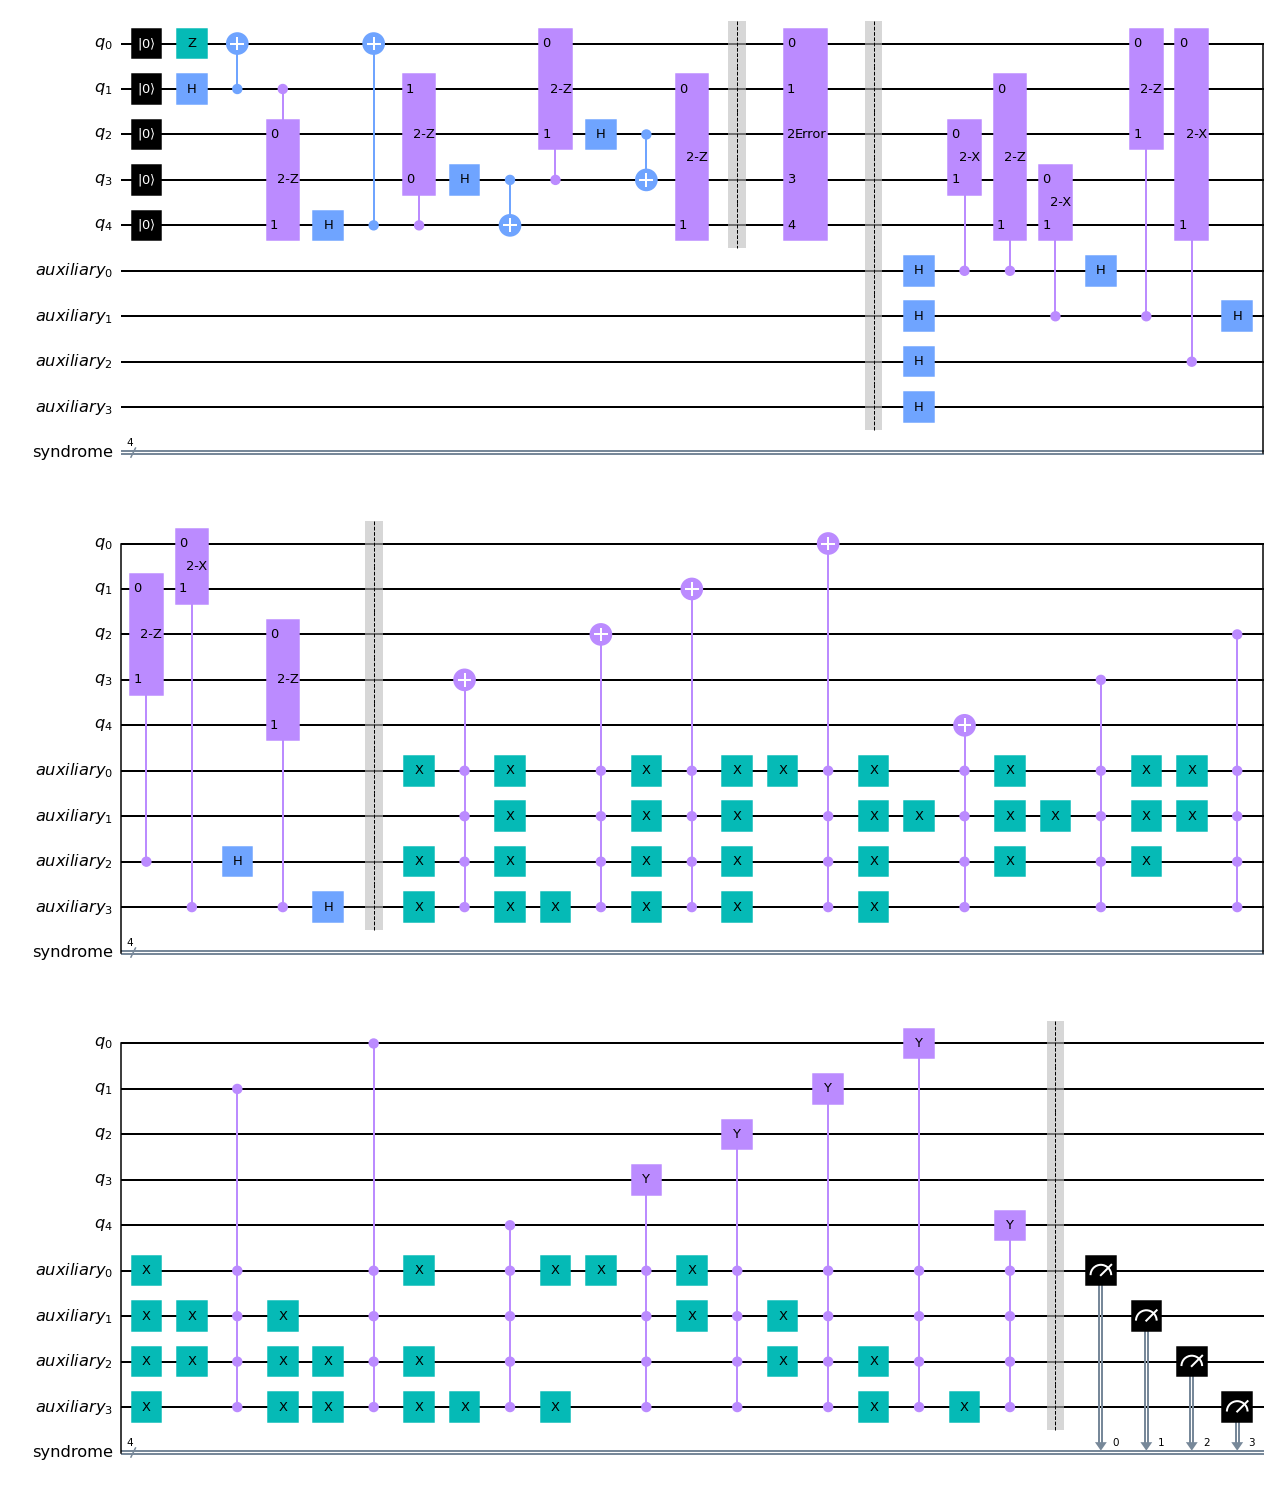

In [10]:
# Error correction
cx4 = MCMT('cx', 4, 1)
cz4 = MCMT('cz', 4, 1)
cy4 = MCMT('cy', 4, 1)

#x0 - 0100
qc_5q.x(5)
qc_5q.x(7)
qc_5q.x(8)
qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 3], inplace=True) #[last arg in list is target]
qc_5q.x(5)
qc_5q.x(7)
qc_5q.x(8)

#x1 - 1010
qc_5q.x(6)
qc_5q.x(8)
qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 2], inplace=True)
qc_5q.x(6)
qc_5q.x(8)

#x2 - 0101
qc_5q.x(5)
qc_5q.x(7)
qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 1], inplace=True)
qc_5q.x(5)
qc_5q.x(7)

#x3 - 0010
qc_5q.x(5)
qc_5q.x(6)
qc_5q.x(8)
qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 0], inplace=True)
qc_5q.x(5)
qc_5q.x(6)
qc_5q.x(8)

#x4 - 1001
qc_5q.x(6)
qc_5q.x(7)
qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 4], inplace=True)
qc_5q.x(6)
qc_5q.x(7)

#z0 - 0011
qc_5q.x(5)
qc_5q.x(6)
qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 3], inplace=True)
qc_5q.x(5)
qc_5q.x(6)

#z1 - 0001
qc_5q.x(5)
qc_5q.x(6)
qc_5q.x(7)
qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 2], inplace=True)
qc_5q.x(5)
qc_5q.x(6)
qc_5q.x(7)

#z2 - 1000
qc_5q.x(6)
qc_5q.x(7)
qc_5q.x(8)
qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 1], inplace=True)
qc_5q.x(6)
qc_5q.x(7)
qc_5q.x(8)

#z3 - 1100
qc_5q.x(7)
qc_5q.x(8)
qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 0], inplace=True)
qc_5q.x(7)
qc_5q.x(8)

#z4 - 0110
qc_5q.x(5)
qc_5q.x(8)
qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 4], inplace=True)
qc_5q.x(5)
qc_5q.x(8)

#y0 - 0111
qc_5q.x(5)
qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 3], inplace=True)
qc_5q.x(5)

#y1 - 1011
qc_5q.x(6)
qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 2], inplace=True)
qc_5q.x(6)

#y2 - 1101
qc_5q.x(7)
qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 1], inplace=True)
qc_5q.x(7)

#y3 - 1110 
qc_5q.x(8)
qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 0], inplace=True)
qc_5q.x(8)

#y4 - 1111
qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 4], inplace=True)

qc_5q.barrier()

for i in range(4):
  qc_5q.measure(5+i, i)

qc_5q.draw('mpl')

# Decoding

After figuring out the syndrome and the error is corrected, we need to get back the original input state at qubit 1. This can be by decoding the logical qubit by applying the encoding operations in the revered order.  
The inital state is generated at the 1st qubit.

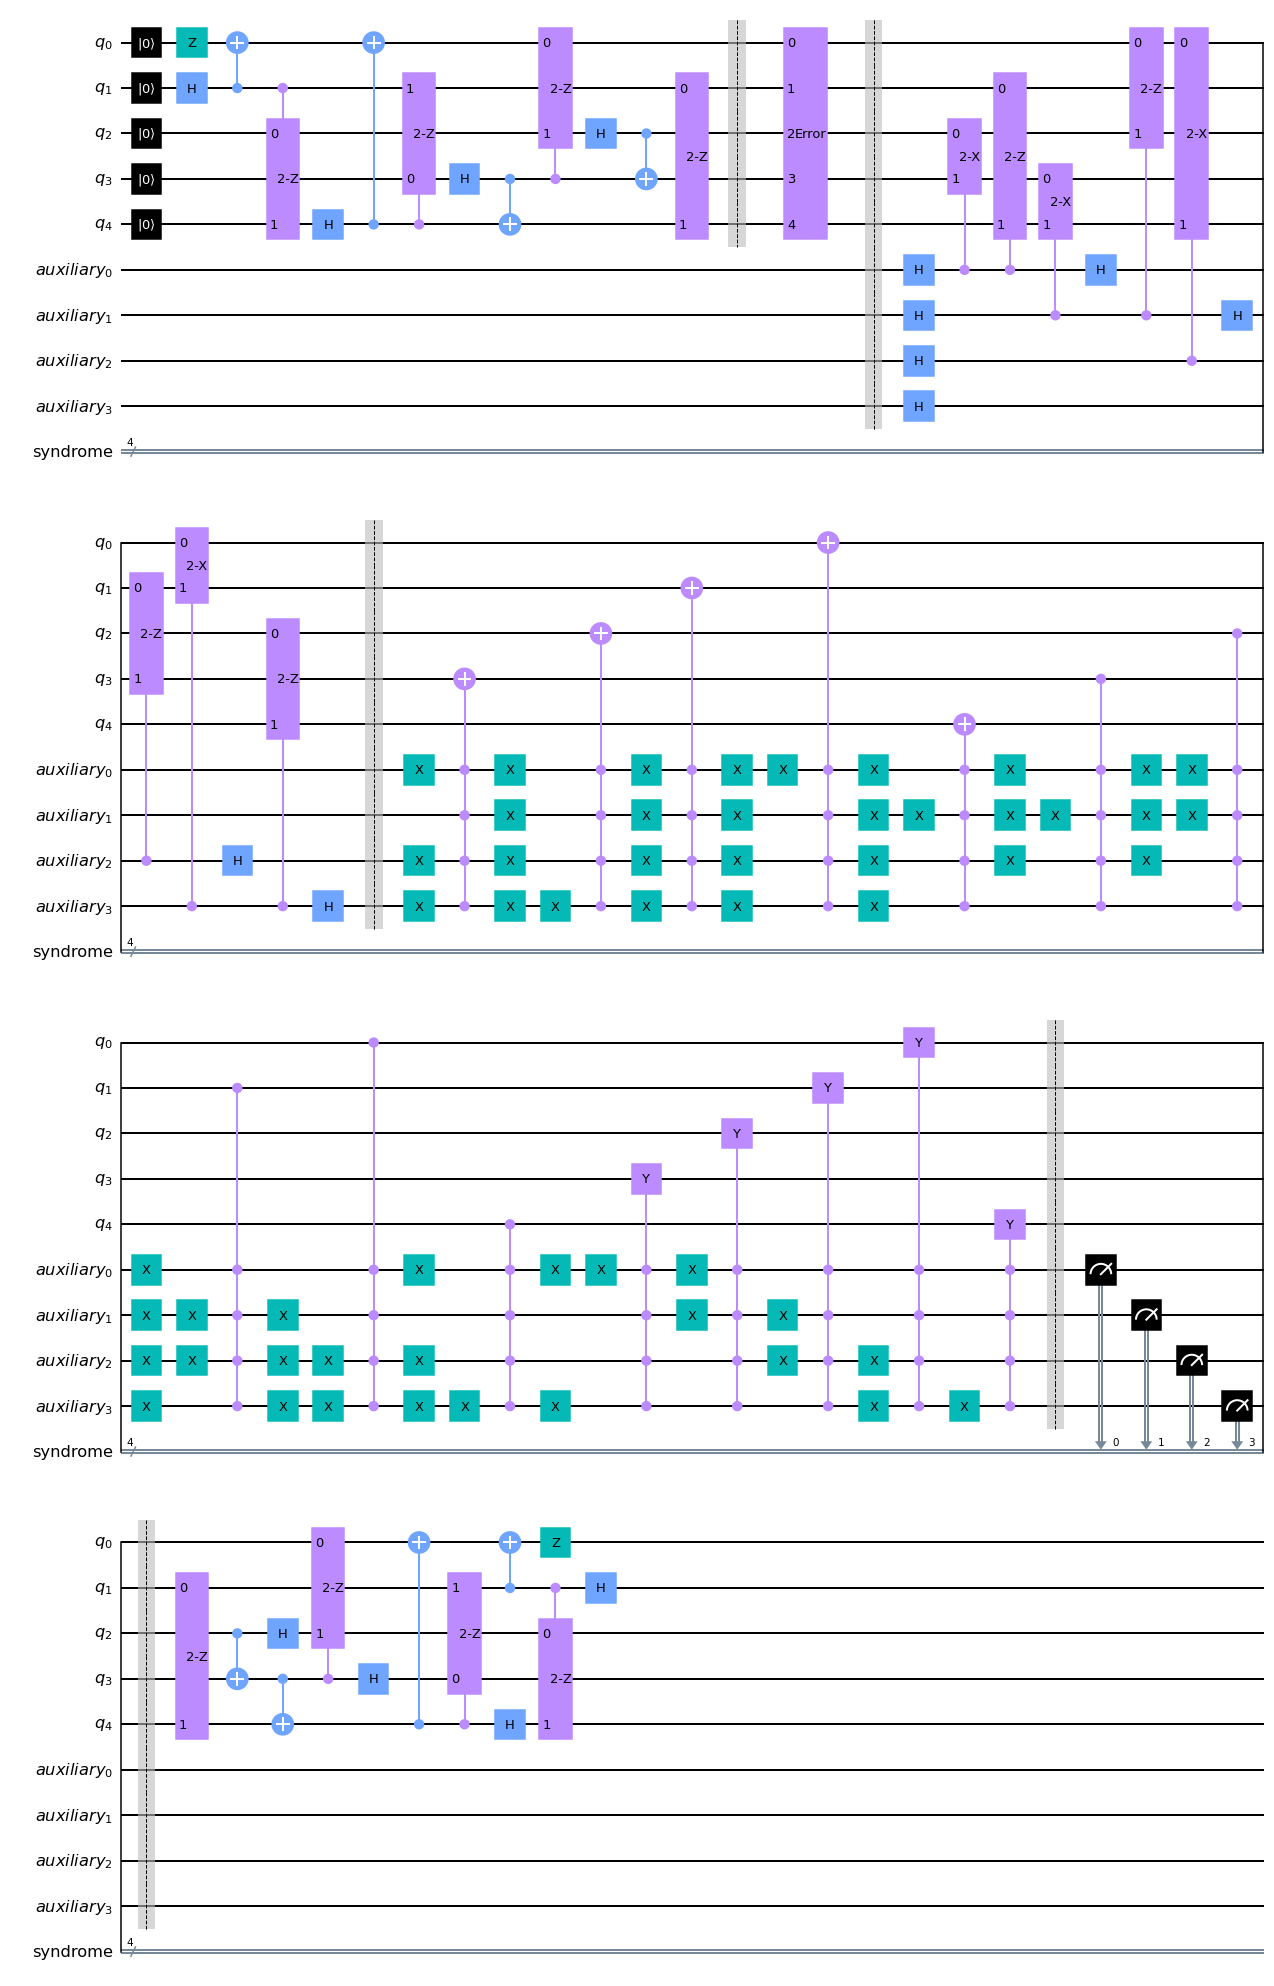

In [11]:
# decoding
qc_5q.barrier()
cz2 = MCMT('cz', 1, 2)

qc_5q.compose(cz2, qubits=[2, 1, 4], inplace=True)
qc_5q.cx(2, 3)
qc_5q.h(2)

qc_5q.cx(3, 4)
qc_5q.compose(cz2, qubits=[3, 0, 2], inplace=True)
qc_5q.h(3)

qc_5q.cx(4, 0)
qc_5q.compose(cz2, qubits=[4, 3, 1], inplace=True)
qc_5q.h(4)

qc_5q.cx(1, 0)
qc_5q.compose(cz2, qubits=[1, 2, 4], inplace=True)
qc_5q.z(0)
qc_5q.h(1)

qc_5q.draw('mpl')

In [12]:
# We add an extra classical register to measure the 1st qubit
qc_5q.add_register(ClassicalRegister(1,"f"))

In [13]:
#Measuring the 1st qubit
qc_5q.measure(0, 4)

In [14]:
qc_5q_trans = transpile(qc_5q, sim)
syndrome = sim.run(qc_5q_trans, shots=1, memory=True).result().get_memory()

Error operation| Syndrome|Error operation| Syndrome| Error operation| Syndrome
:---:|:---:|:---:|:---:|:---:|:---:
$X_0$|0010|$Y_0$|1110|$Z_0$|1100
$X_1$|0101|$Y_1$|1101|$Z_1$|1000
$X_2$|1010|$Y_2$|1011|$Z_2$|0001
$X_3$|0100|$Y_3$|0111|$Z_3$|0011
$X_4$|1001|$Y_4$|1111|$Z_4$|0110

In [15]:
#Dictionary mapping the syndromes to the error operation
syn_gate= {'0010':'X0', '1110':'Y0', '1100':'Z0', 
           '0101':'X1', '1101':'Y1', '1000':'Z1', 
           '1010':'X2', '1011':'Y2', '0001':'Z2',
           '0100':'X3', '0111':'Y3', '0011':'Z3',
           '1001':'X4', '1111':'Y4', '0110':'Z4'}

In [16]:
m= syndrome[0]
q1= m[0]
syn= m[2:]
print("Syndrome measured:", syn)
print("Qubit on which the error is applied before error detection: ", which_qubit)
print("Error Operation applied: ", syn_gate[syn])
print("Measurement of Qubit 1 after error correction and decoding: ", q1)

Syndrome measured: 1101
Qubit on which the error is applied before error detection:  1
Error Operation applied:  Y1
Measurement of Qubit 1 after error correction and decoding:  0


#### Running the code on IBM  

In [17]:
from qiskit import IBMQ #importing IBM quantum computer-simulator
IBMQ.save_account('34cbcfaa2e89af941d928e14957d89a580924a27232310e31922173c2abfd103d935ec2457e0c402c1dfbe093f546ba001225be1a89154865e23c238505a8257')

In [18]:
IBMQ.load_account() #load the account from the saved credentials

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

(1) Choosing a device

In [19]:
provider = IBMQ.get_provider('ibm-q')
provider.backends() #list of backends that are made available from the selecter provider

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
#filtering backends for number of qubits and removing simulators
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 9
                             and not x.configuration().simulator 
                             and x.status().operational==True)
backends

[]

In [21]:
#filtering backends for number of qubits and removing simulators
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 7
                             and not x.configuration().simulator 
                             and x.status().operational==True)
backends

[<IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

There are no available backend providers for n > 7 qubits.

In [22]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 7
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
backend

<IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
backend = provider.get_backend('ibm_nairobi')

In [24]:
def encode(inp1):
  # Encoding
  qc_5q = QuantumCircuit(5)
  qc_5q.reset(range(5))
  
  cz2 = MCMT('cz', 1, 2)
  
  if inp1 == '1':
    qc_5q.z(1)
  else:
    qc_5q.z(0)

  qc_5q.h(1)
  qc_5q.cx(1, 0)
  #qc_5q.cz(1, 2)
  #qc_5q.cz(1, 4)
  qc_5q.compose(cz2, qubits=[1, 2, 4], inplace=True)

  qc_5q.h(4)
  qc_5q.cx(4, 0)
  #qc_5q.cz(4, 1)
  #qc_5q.cz(4, 3)
  qc_5q.compose(cz2, qubits=[4, 3, 1], inplace=True)

  qc_5q.h(3)
  qc_5q.cx(3, 4)
  #qc_5q.cz(3, 0)
  #qc_5q.cz(3, 2)
  qc_5q.compose(cz2, qubits=[3, 0, 2], inplace=True)

  qc_5q.h(2)
  qc_5q.cx(2, 3)
  #qc_5q.cz(2, 1)
  #qc_5q.cz(2, 4)
  qc_5q.compose(cz2, qubits=[2, 1, 4], inplace=True)

  qc_5q.barrier()
  return qc_5q

In [25]:
def apply_err(n, err):
  qc = QuantumCircuit(int(n), name='Error')
  which_qubit = np.random.randint(n)

  if err=='bit':
    qc.x(which_qubit)

  elif err=='phase':
    qc.z(which_qubit)

  elif err=='bit+phase':
    qc.x(which_qubit)
    qc.z(which_qubit)

  else:
    pass

  err = qc.to_gate()

  return err, which_qubit

In [26]:
# Syndrome Detection
def syndrome(qc_5q):
  qc_5q.barrier()
  c_z2 = MCMT('cz', 1, 2) #gate, no of control, no of targets
  c_x2 = MCMT('cx', 1, 2)

  for i in range(4):
    qc_5q.h(5+i)

  #qc_5q.cx(5, 2)
  #qc_5q.cx(5, 3)
  qc_5q.compose(c_x2, qubits=[5, 2, 3], inplace=True)
  qc_5q.compose(c_z2, qubits=[5, 1, 4], inplace=True)

  #qc_5q.cx(6, 3)
  #qc_5q.cx(6, 4)
  qc_5q.compose(c_x2, qubits=[6, 3, 4], inplace=True)
  qc_5q.compose(c_z2, qubits=[6, 0, 2], inplace=True)

  #qc_5q.cx(7, 0)
  #qc_5q.cx(7, 4)
  qc_5q.compose(c_x2, qubits=[7, 0, 4], inplace=True)
  qc_5q.compose(c_z2, qubits=[7, 1, 3], inplace=True)

  #qc_5q.cx(8, 0)
  #qc_5q.cx(8, 1)
  qc_5q.compose(c_x2, qubits=[8, 0, 1], inplace=True)
  qc_5q.compose(c_z2, qubits=[8, 2, 4], inplace=True)

  for i in range(4):
    qc_5q.h(5+i)

  qc_5q.barrier()
  return qc_5q

In [27]:
# Error correction
def error_correction(qc_5q):
  # Error correction
  qc_5q.barrier()
  cx4 = MCMT('cx', 4, 1)
  cz4 = MCMT('cz', 4, 1)
  cy4 = MCMT('cy', 4, 1)

  #x0 - 0100
  qc_5q.x(5)
  qc_5q.x(7)
  qc_5q.x(8)
  qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 3], inplace=True) #[last arg in list is target]
  qc_5q.x(5)
  qc_5q.x(7)
  qc_5q.x(8)

  #x1 - 1010
  qc_5q.x(6)
  qc_5q.x(8)
  qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 2], inplace=True)
  qc_5q.x(6)
  qc_5q.x(8)

  #x2 - 0101
  qc_5q.x(5)
  qc_5q.x(7)
  qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 1], inplace=True)
  qc_5q.x(5)
  qc_5q.x(7)

  #x3 - 0010
  qc_5q.x(5)
  qc_5q.x(6)
  qc_5q.x(8)
  qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 0], inplace=True)
  qc_5q.x(5)
  qc_5q.x(6)
  qc_5q.x(8)

  #x4 - 1001
  qc_5q.x(6)
  qc_5q.x(7)
  qc_5q.compose(cx4, qubits=[5, 6, 7, 8, 4], inplace=True)
  qc_5q.x(6)
  qc_5q.x(7)

  #z0 - 0011
  qc_5q.x(5)
  qc_5q.x(6)
  qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 3], inplace=True)
  qc_5q.x(5)
  qc_5q.x(6)

  #z1 - 0001
  qc_5q.x(5)
  qc_5q.x(6)
  qc_5q.x(7)
  qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 2], inplace=True)
  qc_5q.x(5)
  qc_5q.x(6)
  qc_5q.x(7)

  #z2 - 1000
  qc_5q.x(6)
  qc_5q.x(7)
  qc_5q.x(8)
  qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 1], inplace=True)
  qc_5q.x(6)
  qc_5q.x(7)
  qc_5q.x(8)

  #z3 - 1100
  qc_5q.x(7)
  qc_5q.x(8)
  qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 0], inplace=True)
  qc_5q.x(7)
  qc_5q.x(8)

  #z4 - 0110
  qc_5q.x(5)
  qc_5q.x(8)
  qc_5q.compose(cz4, qubits=[5, 6, 7, 8, 4], inplace=True)
  qc_5q.x(5)
  qc_5q.x(8)

  #y0 - 0111
  qc_5q.x(5)
  qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 3], inplace=True)
  qc_5q.x(5)

  #y1 - 1011
  qc_5q.x(6)
  qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 2], inplace=True)
  qc_5q.x(6)

  #y2 - 1101
  qc_5q.x(7)
  qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 1], inplace=True)
  qc_5q.x(7)

  #y3 - 1110 
  qc_5q.x(8)
  qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 0], inplace=True)
  qc_5q.x(8)

  #y4 - 1111
  qc_5q.compose(cy4, qubits=[5, 6, 7, 8, 4], inplace=True)

  qc_5q.barrier()

  for i in range(4):
    qc_5q.measure(5+i, i)
  
  return qc_5q

In [28]:
def decode(qc_5q):
  # decoding
  cz2 = MCMT('cz', 1, 2)

  qc_5q.compose(cz2, qubits=[2, 1, 4], inplace=True)
  qc_5q.cx(2, 3)
  qc_5q.h(2)

  qc_5q.cx(3, 4)
  qc_5q.compose(cz2, qubits=[3, 0, 2], inplace=True)
  qc_5q.h(3)

  qc_5q.cx(4, 0)
  qc_5q.compose(cz2, qubits=[4, 3, 1], inplace=True)
  qc_5q.h(4)

  qc_5q.cx(1, 0)
  qc_5q.compose(cz2, qubits=[1, 2, 4], inplace=True)
  qc_5q.z(0)
  qc_5q.h(1)
  return qc_5q

For running circuits on real quantum computers, the circuits need to be transpiled for the backend so that only gates that the quantum computer can actually perform are selected. Further, a transpiler can be used to reduce the overall gate count, and subsequently reduce the total length of the input circuits. 

The process generally involves the addition of swap gates so that 2-qubit gates in the circuit map to those pairs of qubits on the device that can actually perform these gates.

In [29]:
def func(inp, error, backend, layout):
  qc = encode(inp)
  
  err, which_qubit = apply_err(5, error)
  
  qc.add_register(QuantumRegister(4, 'auxiliary'))
  qc.add_register(ClassicalRegister(4, 'syndrome'))

  qc_5q.append(err, range(5))

  qc = syndrome(qc)
  qc = error_correction(qc)
  qc = decode(qc)

  qc.draw('mpl')

  #adding the transpile step:
  #initial_layout - pick the qubits on a device for computation 
  #optimization_level - allows selecting from internal defaults for circuit swap mapping and optimization methods to perform
  qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)

  job = sim.run(qc_trans, shots=8192)
  print(job.job_id())
  job_monitor(job) #monitor the status of the ibmq instance
  output = job.result().get_counts()
  #plot_histogram(output)
  return qc_trans, output

In [30]:
backend

<IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>

In [32]:
output_all = []
qc_trans_all = []
prob_all = []
layout = [0,1,2,3,4,5,6]
worst = 1 
best = 0
for i in ['0','1']:
    qc_trans, output = func(i, 'bit', backend, layout)
    output_all.append(output) #list of outputs 
    qc_trans_all.append(qc_trans)
    prob = output[str(int(i=='1'))]/8192  #probability calculation
    prob_all.append(prob)
    print('\nProbability of correct answer for inputs',i,j)
    print('{:.2f}'.format(prob))
    print('-----------------------------------------------')
    worst = min(worst,prob)
    best = max(best,prob)
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

LayoutError: ignored